In [1]:
import pandas as pd
from tqdm.notebook import tqdm

df = pd.read_csv('Download/Cleaned Data/NoSleep.csv')

In [2]:
sample = ''.join([''.join(i) for i in df.sample()['selftext']])
encoded_string = sample.encode("ascii", "ignore")
sample = encoded_string.decode()

In [62]:
import spacy
nlp = spacy.load('en_core_web_lg')

doc = nlp(sample)
sample

'I guess this is it.\n\nI\'m posting this here in hopes that if this happens to the next person, proof will be left behind. I know I\'m not the first and I know I can\'t be the last. I know they\'re getting close to finding me.\n\nWhen I first started digging, I was content. Sure, it was hot but it was much better than being cooped up inside staring at the concrete walls. Inside that prison, you could be rewarded for good behavior. It\'s not a reward in the typical sense such as an extra meal, a warm beverage or a private shower. It\'s the ability to work. You can do some manual labor each and every day in exchange for some fresh air and a small sense of accomplishment. These tasks range from cooking, laundry or serving to making furniture, cleaning up trash or even digging holes.\n\nThere\'s only ever one digger and that was me. I helped the nearby farmers install large fences around their hundreds of acres of property. It was hard work. It was hot and humid and I only had access to a

In [6]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [57]:
from openie import StanfordOpenIE

df_li = []

for sent in doc.sents:
    with StanfordOpenIE() as client:
        for triple in client.annotate(sent.text.lower()):
            triple['original sent'] = sent.text.lower()
            df_li.append(triple)
            
kg_df = pd.DataFrame(df_li)

Starting server with command: java -Xmx8G -cp /home/anthony/stanfordnlp_resources/stanford-corenlp-full-2018-10-05/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-930b4b64a88a4b8f.props -preload openie
Starting server with command: java -Xmx8G -cp /home/anthony/stanfordnlp_resources/stanford-corenlp-full-2018-10-05/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-ab6e215d071d41a8.props -preload openie
Starting server with command: java -Xmx8G -cp /home/anthony/stanfordnlp_resources/stanford-corenlp-full-2018-10-05/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-a787f814276e4a98.props -preload openie
Starting server with command: java -Xmx8G -cp /home/anthony/stanfordnlp_reso

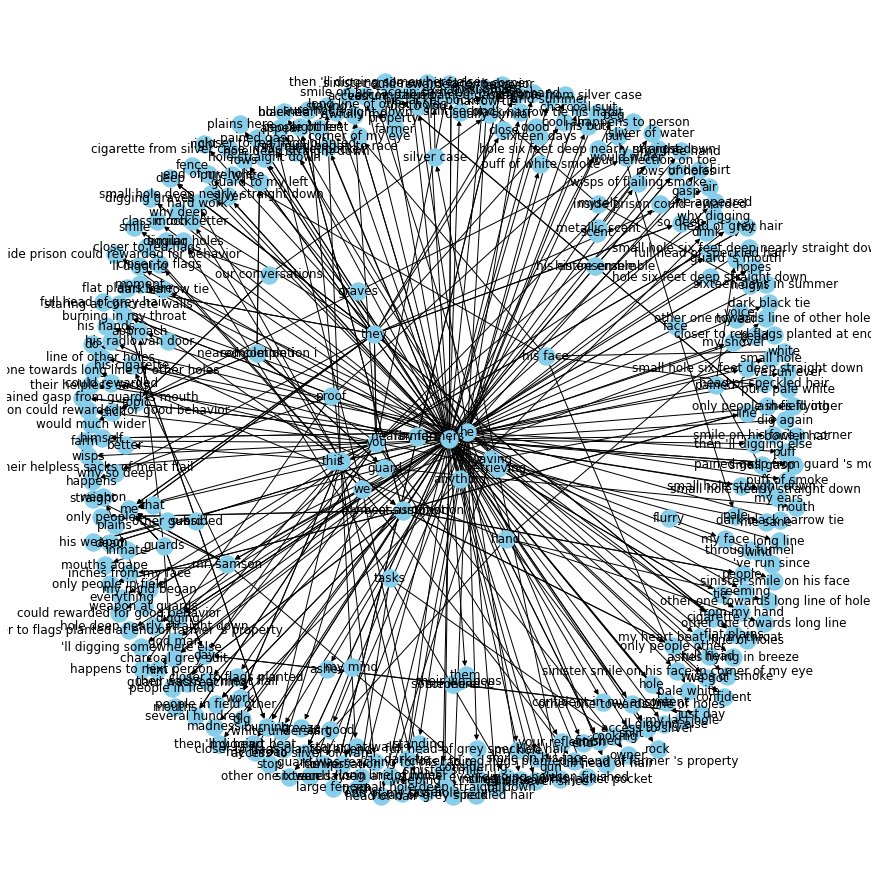

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(pd.DataFrame(df_li), "subject", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
edge_labels = nx.get_edge_attributes(G,'relation')
for old_key in list(edge_labels):
    new_key = old_key[:2]
    edge_labels[new_key] = edge_labels.pop(old_key)
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

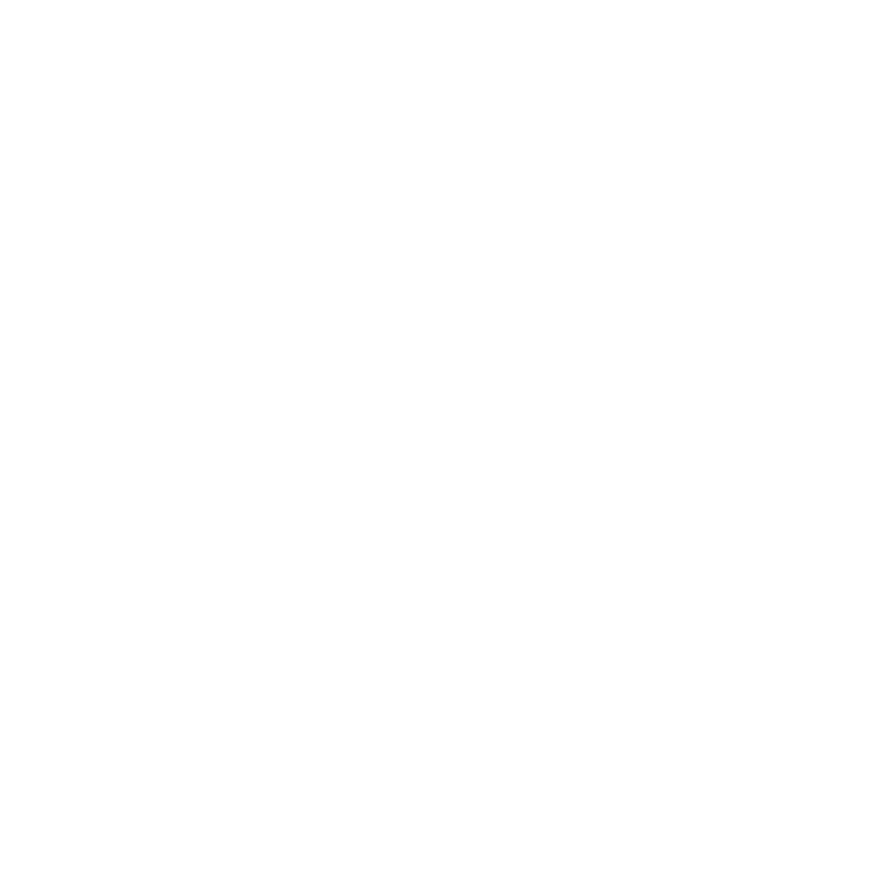

In [63]:
G=nx.from_pandas_edgelist(kg_df[kg_df['subject']=="she"], "subject", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
edge_labels = nx.get_edge_attributes(G,'relation')
for old_key in list(edge_labels):
    new_key = old_key[:2]
    edge_labels[new_key] = edge_labels.pop(old_key)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

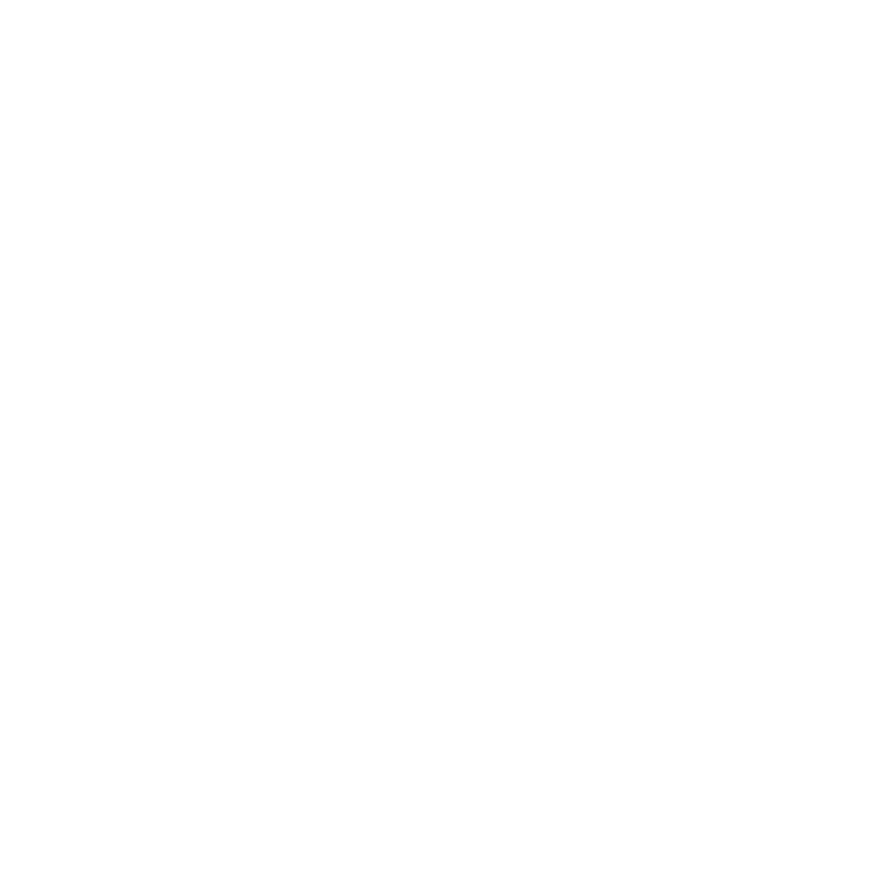

In [65]:
G=nx.from_pandas_edgelist(kg_df[kg_df['object']=="her"], "subject", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
edge_labels = nx.get_edge_attributes(G,'relation')
for old_key in list(edge_labels):
    new_key = old_key[:2]
    edge_labels[new_key] = edge_labels.pop(old_key)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

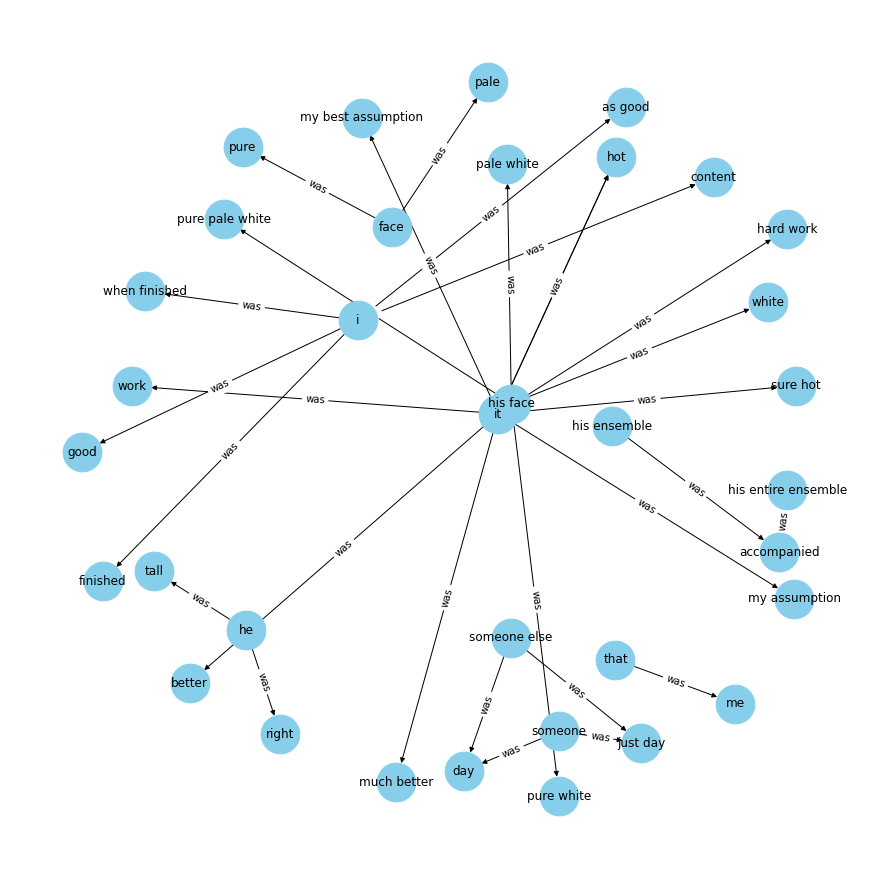

In [60]:
G=nx.from_pandas_edgelist(kg_df[kg_df['relation']=="was"], "subject", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
edge_labels = nx.get_edge_attributes(G,'relation')
for old_key in list(edge_labels):
    new_key = old_key[:2]
    edge_labels[new_key] = edge_labels.pop(old_key)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [61]:
kg_df

,subject,relation,object,original sent
0,this,is,it,i guess this is it.\n\n
1,proof,be left behind,happens to person,"i'm posting this here in hopes that if this happens to the next person, proof will be left behind."
2,i,'m posting in,hopes,"i'm posting this here in hopes that if this happens to the next person, proof will be left behind."
3,proof,be left behind,happens to next person,"i'm posting this here in hopes that if this happens to the next person, proof will be left behind."
4,i,'m posting here in,hopes,"i'm posting this here in hopes that if this happens to the next person, proof will be left behind."
5,proof,be left behind,happens,"i'm posting this here in hopes that if this happens to the next person, proof will be left behind."
6,they,getting,close,i know they're getting close to finding me.\n\n
7,i,started,digging,"when i first started digging, i was content."
8,i,was,content,"when i first started digging, i was content."
9,i,first started,digging,"when i first started digging, i was content."


In [66]:
pd.Series(kg_df['relation']).value_counts()[:50]

was                       29
considering               16
would dig                 14
had                       13
wore                      12
got                        9
waving                     8
could see                  8
are                        7
'll                        6
could                      6
other one towards          6
felt                       6
is in                      5
install                    4
think until                4
heard click as             4
're so deep because of     4
're deep because of        4
fired                      4
think clearly until        4
fired again                4
've on                     4
watched                    4
being cooped up            3
stop                       3
exhaling                   3
'm                         3
looked down at             3
were                       3
cleaning up                3
only had                   3
retrieving                 3
was nearing                3
yelled        